##**SHETH L.U.J. & SIR M.V. COLLEGE**

####Manjit Singh T117

###**Practical No. 06**

**Aim:** Regression and Its Types
* Implement simple linear regression using a dataset.
* Explore and interpret the regression model coefficients and goodness-of-fit measures.
* Extend the analysis to multiple linear regression and assess the impact of additional predictors.



### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

### **Get dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **Describe data**

In [ ]:
# Describe the dataset to understand the statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### **Data distribution**

We will look at the distribution of the target variable, **Balance**.

/tmp/ipython-input-3834705920.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balance'])


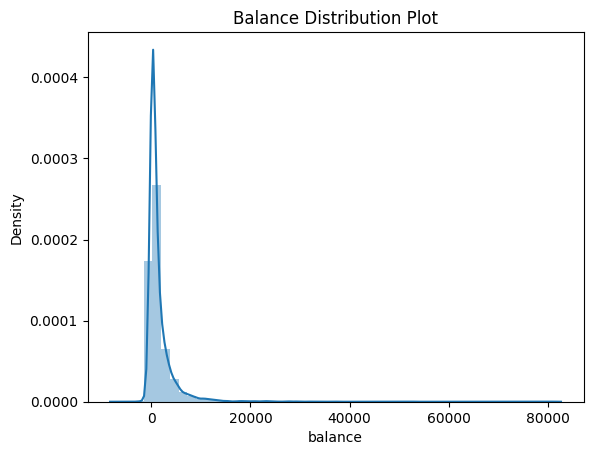

In [ ]:
plt.title('Balance Distribution Plot')
sns.distplot(df['balance'])
plt.show()

### **Relationship between Age and Balance**

We visualize the relationship between our independent variable (**Age**) and dependent variable (**Balance**).

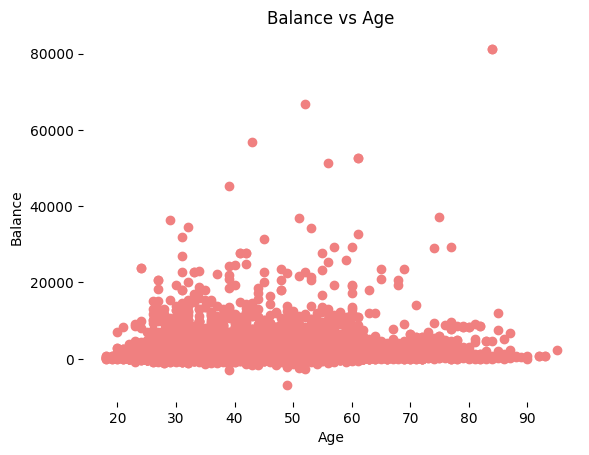

In [ ]:
plt.scatter(df['age'], df['balance'], color = 'lightcoral')
plt.title('Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.box(False)
plt.show()

### **Splitting variables**

We select **Age** (index 0) as the independent variable (X) and **Balance** (index 5) as the dependent variable (y).

In [ ]:
# Splitting variables
# Age is at index 0, Balance is at index 5
X = df.iloc[:, 0:1]  # independent variable (Age)
y = df.iloc[:, 5:6]  # dependent variable (Balance)

### **Splitting dataset into test/train**

In [ ]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Regressor model**

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### **Prediction result**

In [ ]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

### **Prediction on training set**

Visualizing the regression line on the training data.

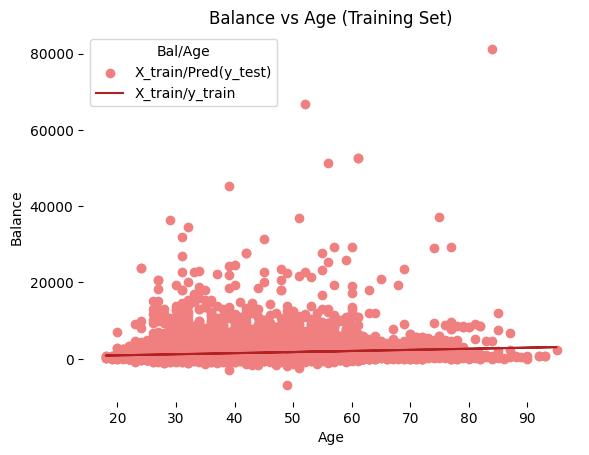

In [ ]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Balance vs Age (Training Set)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Bal/Age', loc='best', facecolor='white')
plt.box(False)
plt.show()

### **Prediction on test set**

Visualizing the regression line on the test data.

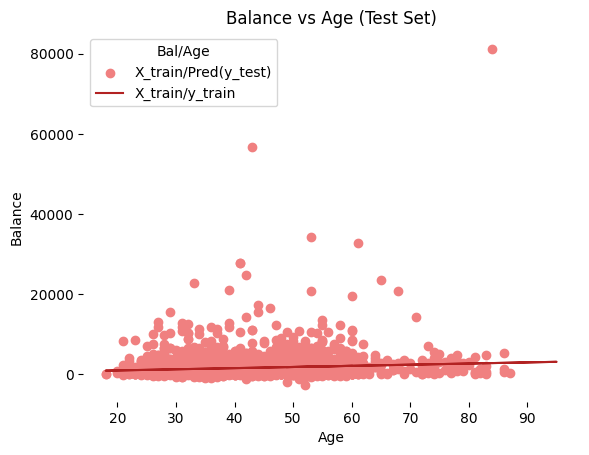

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Balance vs Age (Test Set)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Bal/Age', loc='best', facecolor='white')
plt.box(False)
plt.show()

### **Regressor coefficients and intercept**

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[28.71614826]]
Intercept: [330.61894471]


###Multiple Linear Regression

#### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

### **Get dataset**

In [ ]:
# Get dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **Describe data**

In [ ]:
# Describe data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### **Data distribution**

/tmp/ipython-input-1416386892.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balance'])


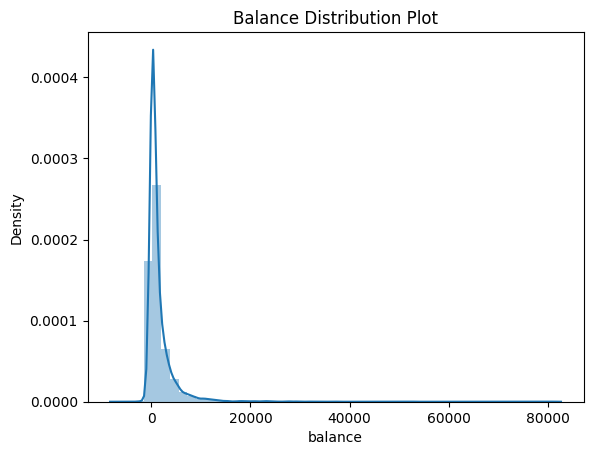

In [ ]:
# Data distribution
plt.title('Balance Distribution Plot')
sns.distplot(df['balance'])
plt.show()

### **Relationship between Balance and Age**

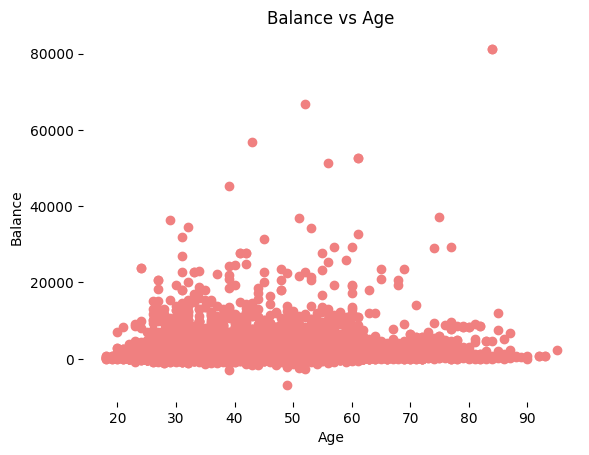

In [ ]:
# Relationship between Balance and Age
plt.scatter(df['age'], df['balance'], color = 'lightcoral')
plt.title('Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.box(False)
plt.show()

### Split dataset in dependent/independent variables

We select the first 4 columns (Age, Job, Marital, Education) as our independent variables (X) and Balance (index 5) as our dependent variable (y).

In [ ]:
# Split dataset in dependent/independent variables
# X includes columns: Age (0), Job (1), Marital (2), Education (3)
X = df.iloc[:, 0:4].values
# y is Balance (column index 5)
y = df.iloc[:, 5].values

### One-hot encoding of categorical data

We need to encode the categorical text columns: Job (index 1), Marital (index 2), and Education (index 3).

In [ ]:
# One-hot encoding of categorical data
# Encoding Job, Marital, and Education
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

### **Split dataset into test/train**

In [ ]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Train multiple regression model**

In [ ]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### **Predict result**

In [ ]:
# Predict result
y_pred = regressor.predict(X_test)

### **Compare predicted result with actual value**

In [ ]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
print(result)

[[1181.4    88.  ]
 [2033.95 1938.  ]
 [ 881.46  245.  ]
 ...
 [ 929.71 3285.  ]
 [1739.35  654.  ]
 [1035.01 3164.  ]]
